In [25]:
from time import strftime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import datetime 
import re
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from math import factorial
from scipy.signal import savgol_filter

In [26]:
return_scale = 1
#Autocorrelation lags
lags = 45
lags_min = lags - lags

# VIX Data

In [27]:
d1_name ="Data/VIX_History*"
d1_filename = glob.glob(d1_name)[0]
d1= pd.read_csv(d1_filename)
d1["returns"] = d1["CLOSE"] - d1["CLOSE"].shift(return_scale)
d1=d1.dropna()

# All Users

                     Users  New Users
Time                                 
2020-08-11 00:00:00     42         34
2020-08-11 01:00:00     51         25
2020-08-11 02:00:00     31         20
2020-08-11 03:00:00     28          6
2020-08-11 04:00:00     25          8
...                    ...        ...
2022-10-10 19:00:00     73         28
2022-10-10 20:00:00     90         28
2022-10-10 21:00:00     93         34
2022-10-10 22:00:00    101         48
2022-10-10 23:00:00     87         31

[18981 rows x 2 columns]


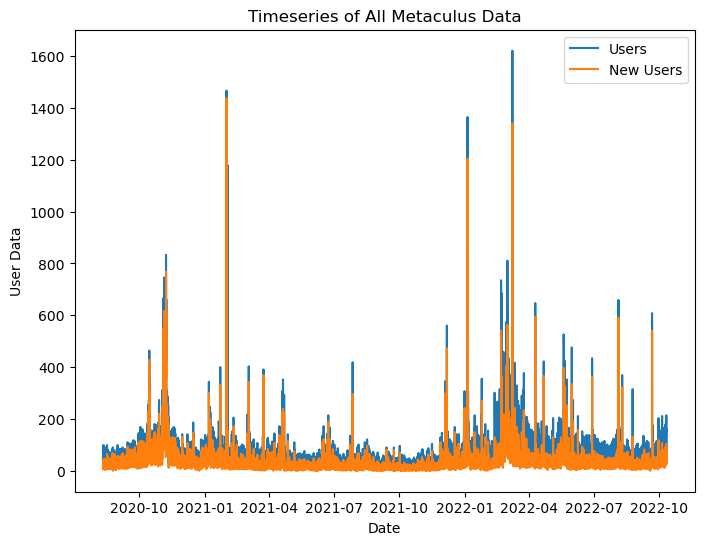

In [57]:
partial_name = f'Data/All_Metaculus*'
filename = glob.glob(partial_name)[0]
df= pd.read_csv(filename, parse_dates=['Time'], index_col = ['Time'])
df= df[df['Users'] != 0]
#df=df.loc[start_date:]
X= df.index
print(df)

plt.figure(figsize=(8, 6))
for i in df.columns:
        plt.plot(X,df[i], label = i)

plt.title("Timeseries of All Metaculus Data")
plt.xlabel("Date")
plt.ylabel("User Data")
plt.legend()
plt.show()

In [64]:
all_daily = df.copy()
all_daily = all_daily.resample("1D").sum()
print(all_daily.head(25))

            Users  New Users
Time                        
2020-08-11   1093        605
2020-08-12   1021        502
2020-08-13   1125        620
2020-08-14   1049        491
2020-08-15    922        501
2020-08-16   1113        599
2020-08-17   1214        708
2020-08-18   1034        608
2020-08-19   1055        602
2020-08-20   1005        584
2020-08-21    884        535
2020-08-22    847        521
2020-08-23    986        621
2020-08-24   1139        711
2020-08-25   1071        632
2020-08-26    974        588
2020-08-27   1092        626
2020-08-28    967        589
2020-08-29    837        484
2020-08-30   1239        750
2020-08-31   1343        795
2020-09-01   1164        709
2020-09-02   1144        667
2020-09-03   1077        633
2020-09-04   1193        695


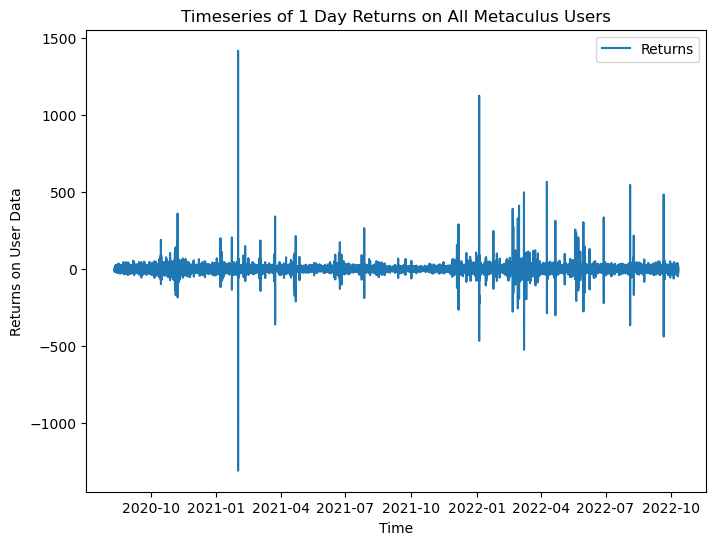

In [49]:
all_returns = df.iloc[:,1] - df.iloc[:,1].shift(return_scale)
all_returns = all_returns.dropna().to_frame()


all_returns.columns = ["Returns"]
all_returns.index.rename("DATE", inplace= True)
#all_returns["Returns"] = np.log(all_returns["Returns"])

plt.figure(figsize=(8, 6))
for i in all_returns.columns:
        plt.plot(all_returns.index,all_returns[i], label = i)

plt.title("Timeseries of {} Day Returns on All Metaculus Users".format(return_scale))
plt.xlabel("Time")
plt.ylabel("Returns on User Data")
plt.legend()
plt.show()


# New Users

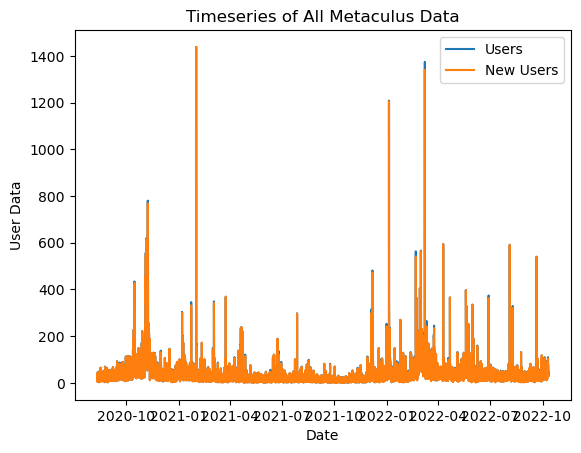

In [8]:
partial_name = f'Data/New_Metaculus*'
filename = glob.glob(partial_name)[0]
df= pd.read_csv(filename, parse_dates=['Time'], index_col = ['Time'])
df= df[df['Users'] != 0]
#df=df.loc[start_date:]
X= df.index


for i in df.columns:
        plt.plot(X,df[i], label = i)

plt.title("Timeseries of New Metaculus Data")
plt.xlabel("Date")
plt.ylabel("User Data")
plt.legend()
plt.show()

# Search Users

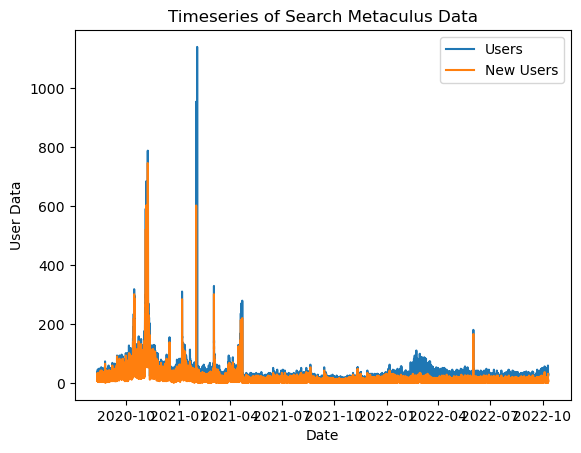

In [23]:
partial_name = f'Data/Search_Metaculus*'
filename = glob.glob(partial_name)[0]
df= pd.read_csv(filename, parse_dates=['Time'], index_col = ['Time'])
df= df[df['Users'] != 0]
#df=df.loc[start_date:]
X= df.index


for i in df.columns:
        plt.plot(X,df[i], label = i)

plt.title("Timeseries of Search Metaculus Data")
plt.xlabel("Date")
plt.ylabel("User Data")
plt.legend()
plt.show()

# Organic Users

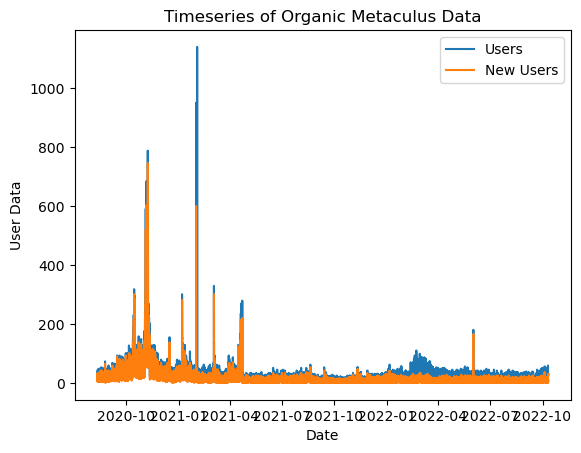

In [24]:
partial_name = f'Data/Organic_Metaculus*'
filename = glob.glob(partial_name)[0]
df= pd.read_csv(filename, parse_dates=['Time'], index_col = ['Time'])
df= df[df['Users'] != 0]
#df=df.loc[start_date:]
X= df.index


for i in df.columns:
        plt.plot(X,df[i], label = i)

plt.title("Timeseries of Organic Metaculus Data")
plt.xlabel("Date")
plt.ylabel("User Data")
plt.legend()
plt.show()